## Quadrat correlation analysis

The Quadrat Correlation Matrix (QCM) is a tool in spatial analysis that helps us understand relationships between different points or features in a spatial dataset. Think of it as a way to check how often certain things (like points with specific labels) tend to show up in the same neighborhood—essentially looking for patterns of "hanging out together" in space.

Here’s how it works: the QCM divides your study area into smaller regions, called quadrats (or sometimes hexagons, depending on the method). Then it calculates how often different features (like labels A and B) appear together within these regions compared to what you’d expect if everything were scattered randomly (complete spatial randomness). If they show up together more than expected, it might mean there's some kind of relationship or spatial clustering going on.

For a formal definition of this method, see Morueta-Holme et al. 2016: https://doi.org/10.1111/ecog.01892. For example applications of its use in spatial biology, see:
[1] Bull, Joshua A., et al. "Integrating diverse statistical methods to analyse stage-discriminatory cell interactions in colorectal neoplasia." bioRxiv (2024): 2024-06,  https://doi.org/10.1101/2024.06.02.597010 or [2] Weeratunga, Praveen, et al. "Single cell spatial analysis reveals inflammatory foci of immature neutrophil and CD8 T cells in COVID-19 lungs." Nature Communications 14.1 (2023): 7216, https://doi.org/10.1038/s41467-023-42421-0.

In this tutorial, we run through how to use the QCM function in MuSpAn. We'll start with our standard import and example dataset.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

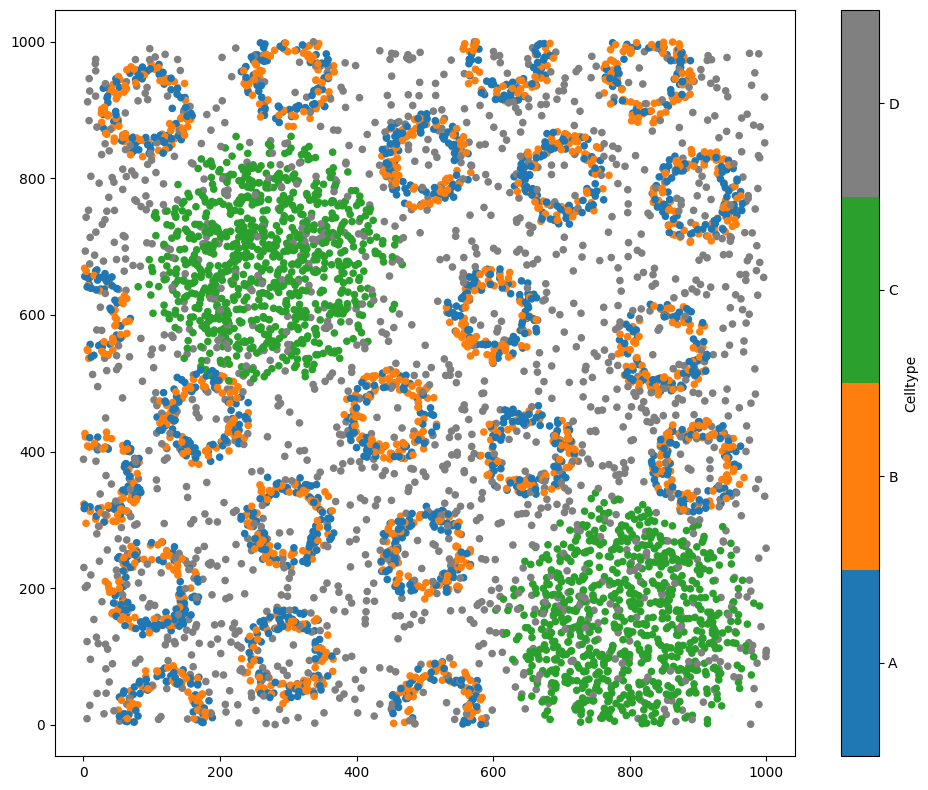

In [1]:
# Import the required libraries
import muspan as ms
import numpy as np  

# Load an example domain dataset
example_domain = ms.datasets.load_example_domain('Synthetic-Points-Architecture')

# Visualize the example domain with respect to 'Celltype'
ms.visualise.visualise(example_domain, 'Celltype')

The `quadrat_correlation_matrix` function, found in the `region_based` module, is used to perform Quadrat Correlation Matrix (QCM) analysis.

The QCM offers flexibility by allowing the use of predefined regions through the parameters `regions_label_name` or `regions_collection_name`. These parameters enable you to specify regions based on labels or collections, respectively. We’ll discuss these options in more detail later.

However, if neither of these parameters is provided, the function will automatically generate regions for the QCM analysis. In this case, the `region_method` parameter is used to determine the method for generating the regions. You can choose between methods like `generate_quadrats` (for rectangular grids) or `generate_hexgrids` (for hexagonal grids). Additionally, you can further customize the generated regions using the `region_kwargs` parameter.

While this may initially seem complex, it offers a great deal of flexibility, enabling more tailored and generalized analysis options. For basic usage, however, you can keep it simple by specifying only the label for analysis and the size of your regions. This straightforward approach allows you to perform QCM analysis efficiently without needing to dive into the more advanced options.


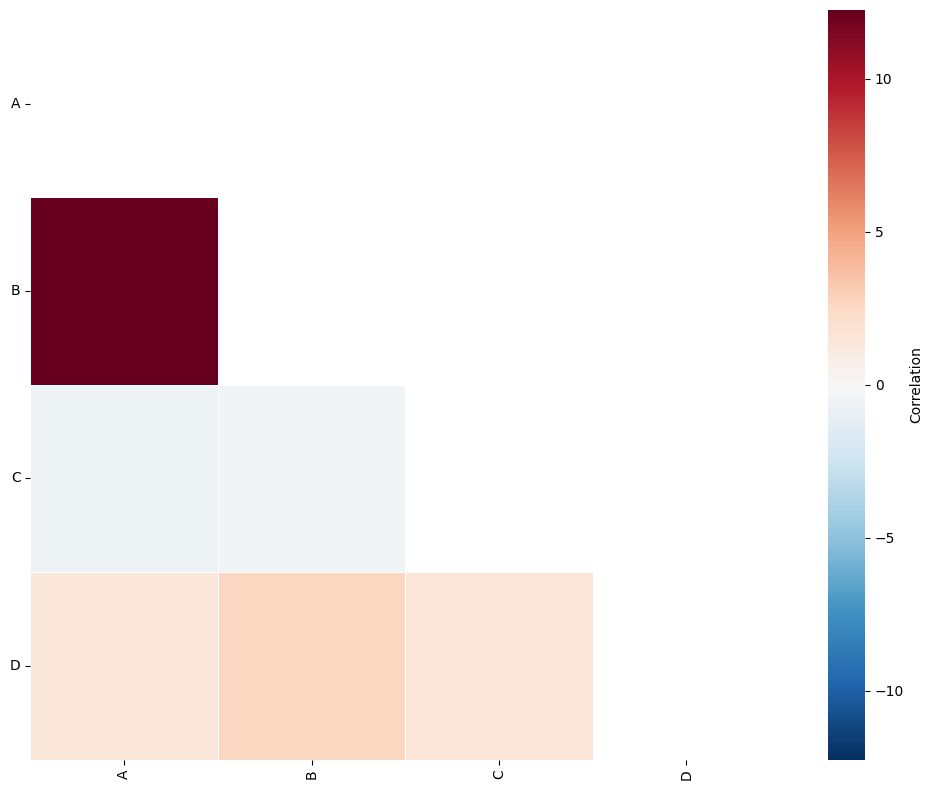

In [2]:
# Perform Quadrat Correlation Matrix analysis using quadrats as the region method
# Set the side length of the quadrats to 100 units
SES, A, label_categories = ms.region_based.quadrat_correlation_matrix(
    example_domain,
    label_name='Celltype',
    region_method='quadrats',
    region_kwargs=dict(side_length=100),
    visualise_output=True,
    alpha=0.05
)

# SES: Standardized Effect Sizes matrix
# A: Correlation matrix
# label_categories: ordered categories of the label

The QCM gives three outputs:
1. SES (Standard effect size): this is a z-score of the observed count of labelled pairs compared to complete spatial randomness. Numbers larger than 0 indicate co-localisation in tiling regions. Numbers lower than 0 indicate exclusion of the label pair in the quadrats.
2. A-matrix: The A matrix is a SES matrix filtered to only show interactions with a p-value less than the chosen significance threshold (α).
3. Label_categories: A list of the labels used to compute with QCM with.



Points with labels A and B are observed to co-occur within the same quadrats more often than would be expected under the assumption of complete spatial randomness. This suggests that there is statistically significant spatial co-localisation of these points within a 100-unit region.

To better understand and present these results, we can visualise the A matrix using the `visualise_correlation_matrix` function, available in the `visualise` submodule.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

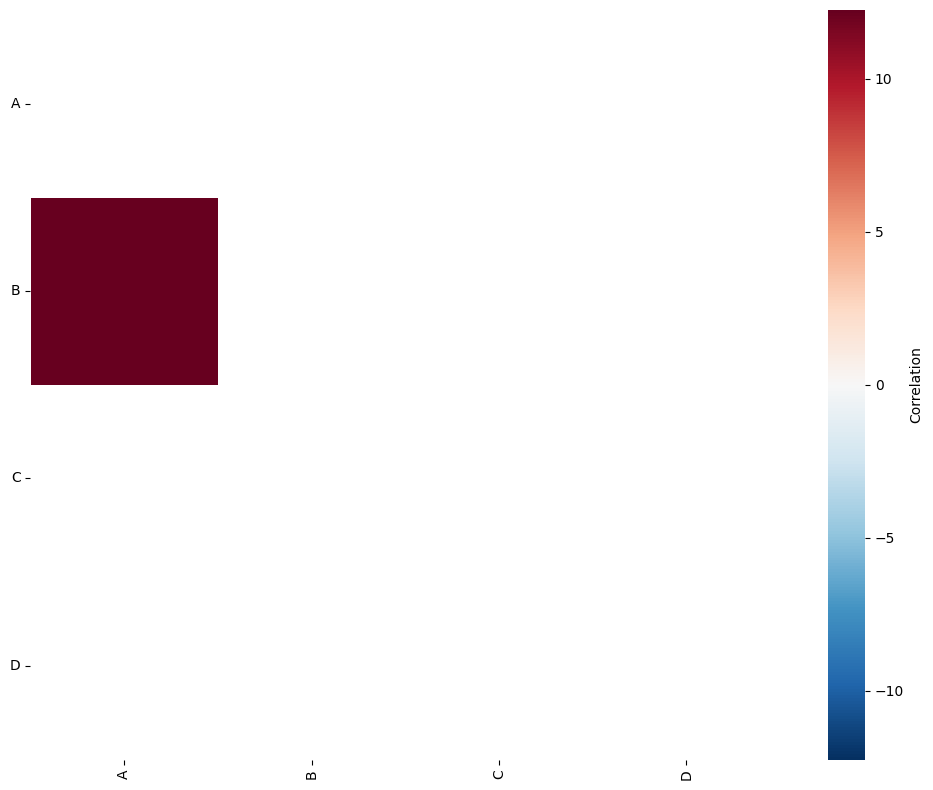

In [3]:
# Visualize the correlation matrix
# 'A' is the correlation matrix obtained from the Quadrat Correlation Matrix analysis
# ['A', 'B', 'C', 'D'] are the labels for the matrix
# 'triangle_to_plot' specifies which part of the matrix to plot ('lower' in this case)
ms.visualise.visualise_correlation_matrix(A, label_categories, triangle_to_plot='lower')

By visualising the A matrix we can see that using the quadrat regions of side length 100-units, we have identified the co-localisation of points A and B.

### Using hexgrid with QCM

We could have also used the hexagonal regions for the QCM. For this we can set `region_method='hexgrid` as show below.

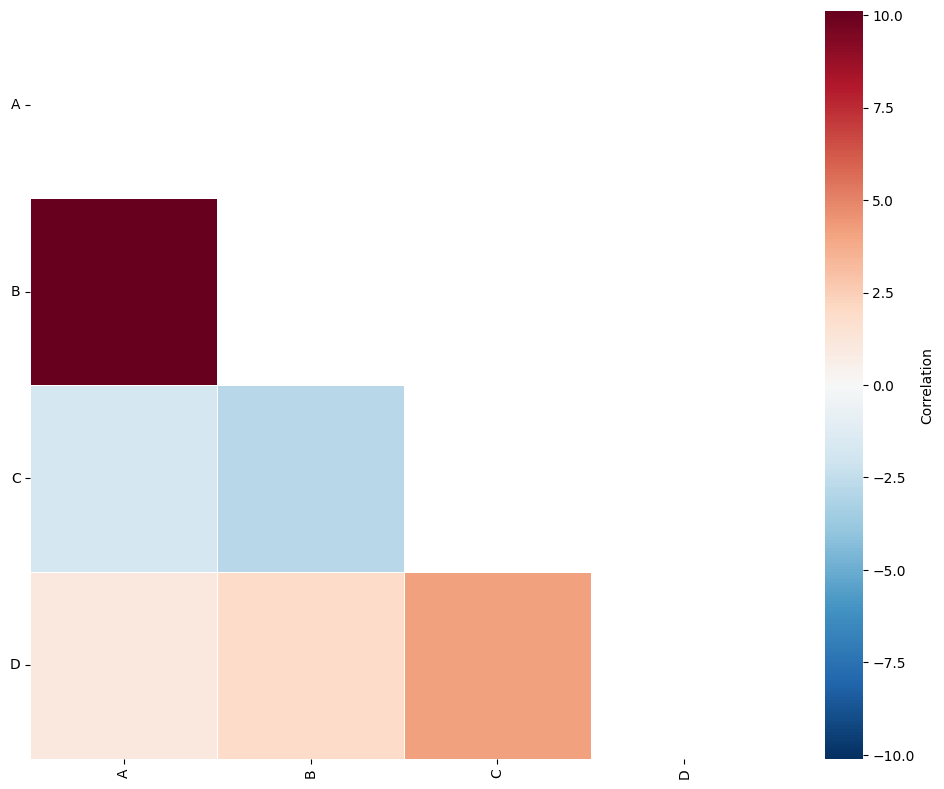

In [4]:
# Calculate the equivalent side length for hexagonal grid cells
hex_equivalent_side_length = 100 * np.sqrt(2 / (3 * np.sqrt(3)))

# Perform Quadrat Correlation Matrix analysis using hexgrid as the region method
# Set the side length of the hexgrid cells to the calculated equivalent side length
SES, A, label_categories = ms.region_based.quadrat_correlation_matrix(
    example_domain,
    label_name='Celltype',
    region_method='hexgrid',
    region_kwargs=dict(side_length=hex_equivalent_side_length),
    visualise_output=True
)

### QCM with any regions

We could also use any existing shapes representing a tiling for our regions in the QCM by using either the `regions_label_name` or `regions_collection_name` parameters. We'll explore this functionality by generating a tiling first.

Domain name: Architecture
Number of objects: 6112
Collections: ['Cell centres', 'some regions']
Labels: ['Celltype', 'hex ROI', 'region counts: A', 'region counts: B', 'region counts: C', 'region counts: D'] 
Networks: [] 
Distance matrices: []


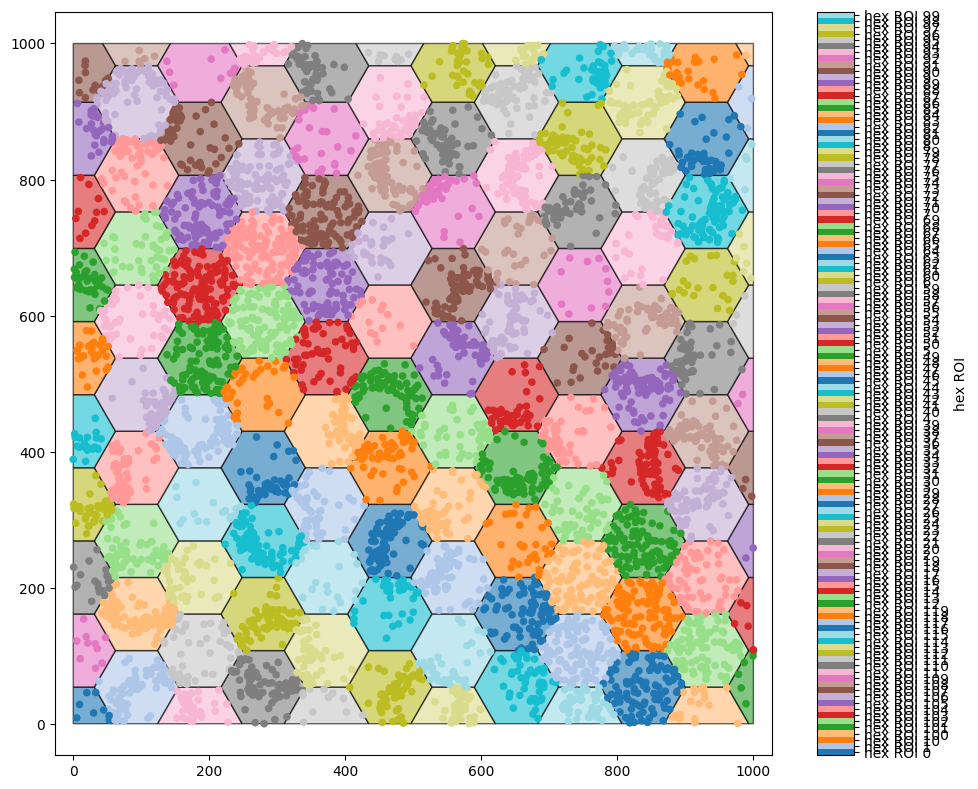

In [5]:
# Generate hexagonal grid regions for the example domain
# 'hex_equivalent_side_length' is the side length of the hexagonal grid cells
# 'hex ROI' is the label that assigns objects to their corresponding hexagonal region
# 'some regions' is the collection name that defines our regions
ms.region_based.generate_hexgrid(
    example_domain,
    side_length=hex_equivalent_side_length,
    region_label_name='hex ROI',
    regions_collection_name='some regions'
)

# Visualize the example domain with respect to the generated hexagonal regions
ms.visualise.visualise(example_domain, 'hex ROI')

# Print the example domain to inspect its properties
print(example_domain)

#### QCM with region labels

If we have categorical labels defining some regions on our objects of interest, we can pass this QCM function using the `regions_label_name` parameter. Using our hexgrid above, we have introduced the label 'hex ROI' which assigns objects to their corresponding region. We can pass this label to the QCM function to see an identical results to our previous hexgrid QCM analysis.


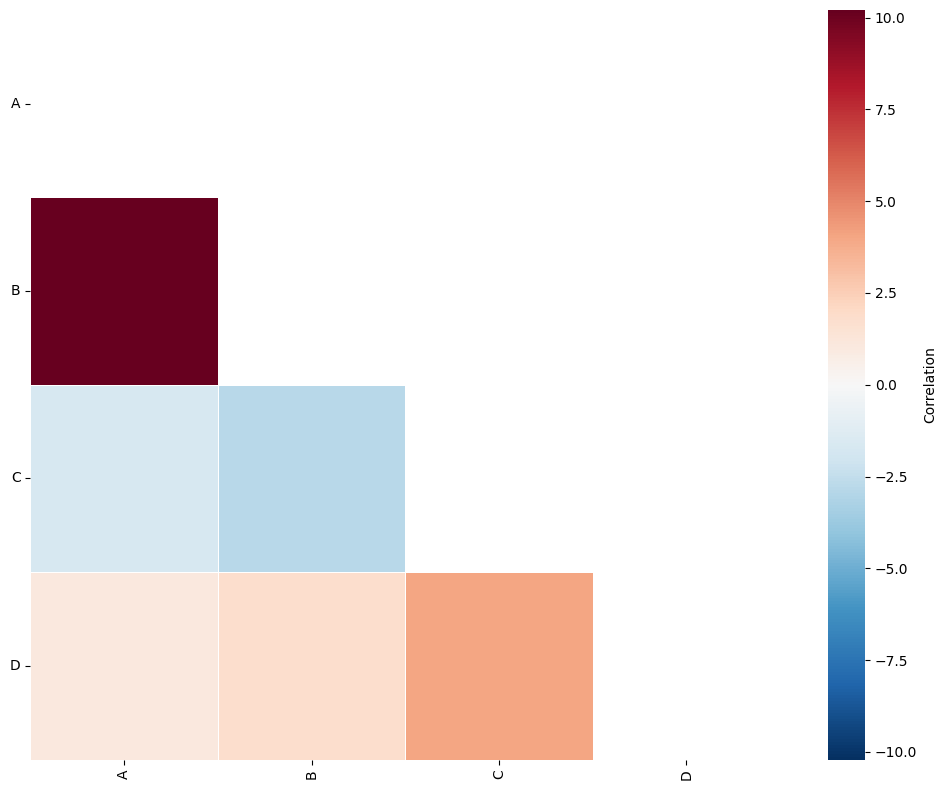

In [6]:
# Perform Quadrat Correlation Matrix analysis using predefined hexagonal regions
# 'hex ROI' is the label that assigns objects to their corresponding hexagonal region
SES, A, label_categories = ms.region_based.quadrat_correlation_matrix(
    example_domain,
    label_name='Celltype',
    regions_label_name='hex ROI',
    visualise_output=True
)

#### QCM with region collection shapes

If we already have a collection of shape objects defining our tilings, we can pass this to the QCM using the regions_collection_name parameter.

Keep in mind that this approach will take longer to compute. First, the objects need to be assigned to each region, and then the observation matrix must be generated. Typically, this process is handled during the initial creation of regions. However, in this case, the shapes might not originate from our `region_based` submodule and could be any arbitrary shapes.



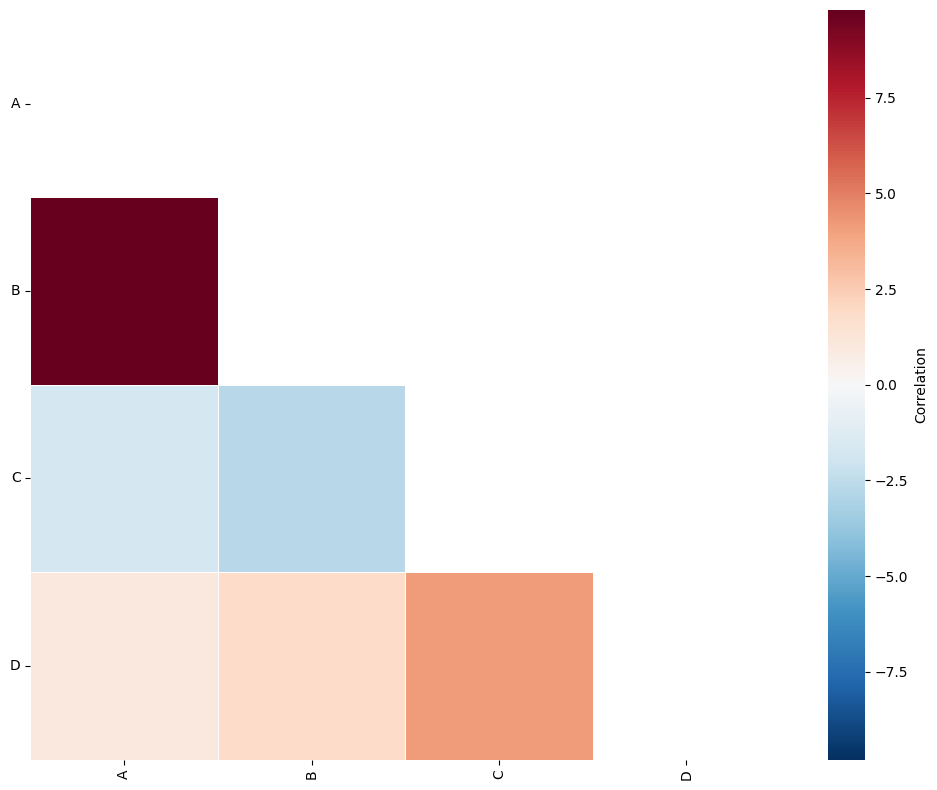

In [7]:
# Perform Quadrat Correlation Matrix analysis using a collection of predefined regions
# 'some regions' is the collection name that defines our regions
SES, A, label_categories = ms.region_based.quadrat_correlation_matrix(
    example_domain,
    label_name='Celltype',
    regions_collection_name='some regions',
    visualise_output=True
)

In summary, the QCM is a valuable tool for identifying sets of co-localised and excluded labeled objects within a domain, as compared to complete spatial randomness. The size of the regions determines the length scale of these interactions, so adjusting this parameter can reveal important insights into the nature of the interactions. It is an efficient method for quantifying all pairwise interactions in a given domain and therefore can be used to isolate subsets of interest for further spatial analysis.
